## Churn de Crédito

O seguinte modelo foi desenvolvido com o intuito de faze a previsão de churn com base nos dados já existentens de clientes.
Todo o projeto foi desenvolvido seguindo algumas etapas predeterminadas, listadas a seguir:

1. **Aquisição de dados:** De duas fontes, com datasets de mesmo tamanho e suas descrições;
2. **Preparação dos dados coletados:** Integração das fontes, limpeza, normalização, reescalonamento, padronização;
3. **Análise dos dados:** Tipo de cada dado, categórico ou numérico, estatísticas dos dadosm, destacar outliers;
4. **Variáveis mais relevantes:** Sexo, gênero, salário, score bancário;5. **Modelo de Machine Learning:** Clusterização, classificação, regressão, tipo do modelo, descrição, teste e previsão.

As etapas são necessárias pois são o pipeline de tratamento dos dados. No caso, o foco não é resolver o problema de churn, mas sim observar e identificar possíveis clientes que possam desistir do uso do crédito, com base nos seus dados.
")
;
");






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn as sk
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

#from warnings import simplefilter
#simplefilter(action='ignore', category='FutureWarning')

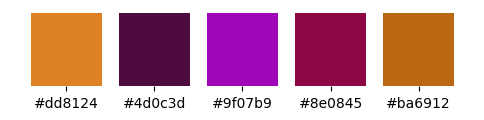

In [2]:
# Lista de cores e valores para cada cor
colors = ['#dd8124', '#4d0c3d', '#9f07b9', '#8e0845', '#ba6912']
values = [1 for x in colors]
   
#Configurando tamanho do gráfico e criando ele
plt.figure(figsize=(6, 1))
plt.bar(colors, values, color=colors)

# Removendo as bordas
ax = plt.gca()  # gca significa "get current axes"
for spine in ax.spines.values():
    spine.set_visible(False)

# Removendo os números dos eixos e exibindo o gráfico (as cores)
#ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [3]:
#Reading the CSV archives
df1 = pd.read_csv('../Dados/Customer-Churn-Records1.csv', delimiter=";")
df2 = pd.read_csv('../Dados/Customer-Churn-Records2.csv', delimiter=";")
df3 = pd.read_csv('../Dados/Customer-Churn-Records3.csv', delimiter=";")

In [4]:
#Concatenating the dataframes
df = pd.concat([df1, df2, df3], axis=0)

#Observando o dataframe criado
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647311,Hill,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
1,15737888,Mitchell,850,Spain,Female,43,2,12551082,1,1,1,790841,0
2,15574012,Chu,645,Spain,Male,44,8,11375578,2,1,0,14975671,1
3,15656148,Obinna,376,Germany,Female,29,4,11504674,4,1,0,11934688,1
4,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,7639001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,15783019,Price,794,France,Female,62,9,12368132,3,1,0,17358663,1
3740,15728912,Swanson,554,France,Female,44,6,9243686,1,1,0,1260339,0
3741,15583480,Morgan,807,France,Female,36,4,0,2,0,1,14700733,0
3742,15613886,Trevisan,722,Spain,Male,43,1,0,1,1,0,4456017,1


In [5]:
#Observando os valores 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,11236.0,1.569070e+07,7.150590e+04,15565701.0,15628301.75,15690231.0,15752508.0,15815660.0
CreditScore,11236.0,6.506526e+02,9.748645e+01,350.0,583.00,652.0,718.0,850.0
Age,11236.0,3.901086e+01,1.062694e+01,18.0,32.00,37.0,44.0,88.0
Tenure,11236.0,5.005518e+00,2.876600e+00,0.0,3.00,5.0,8.0,10.0
Balance,11236.0,6.923239e+06,6.292396e+06,0.0,0.00,8476479.0,12436885.0,25089809.0
NumOfProducts,11236.0,1.523852e+00,5.797816e-01,1.0,1.00,1.0,2.0,4.0
HasCrCard,11236.0,7.069242e-01,4.551932e-01,0.0,0.00,1.0,1.0,1.0
IsActiveMember,11236.0,5.109470e-01,4.999024e-01,0.0,0.00,1.0,1.0,1.0
EstimatedSalary,11236.0,9.124041e+06,6.134685e+06,1158.0,3373827.00,8932767.0,14396156.0,19997074.0
Exited,11236.0,2.053222e-01,4.039548e-01,0.0,0.00,0.0,0.0,1.0


In [6]:
#Excluindo colunas desnecessárias
df = df.drop(columns=['Surname', 'CustomerId'], axis=1)


In [7]:
#Observando os dados de uma das linhas com o maior salário
df[df['EstimatedSalary'] == df['EstimatedSalary'].max()].head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1788,639,Germany,Female,41,5,9863577,1,1,0,19997074,0


In [8]:
#Observando os dados de uma das linhas com o menor salário
df[df['EstimatedSalary'] == df['EstimatedSalary'].min()].head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1223,709,Germany,Male,45,4,12291771,1,1,1,1158,1


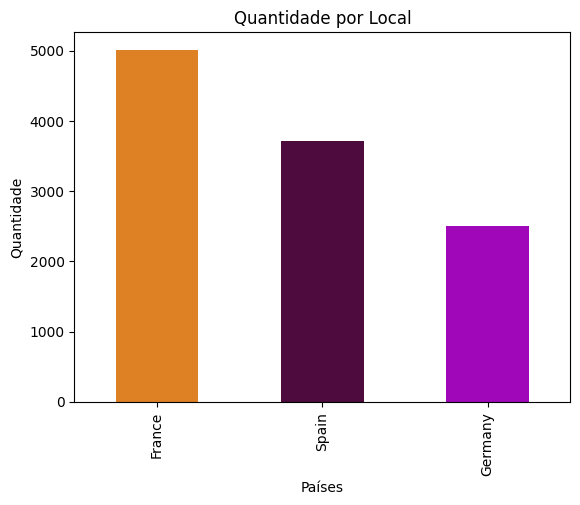

In [9]:
# Criando um gráfico de barras para observar as proporções entre os lugares
df['Geography'].value_counts().plot(kind='bar', color=colors)

# Adicionando título e rótulos aos eixos
plt.title('Quantidade por Local')
plt.xlabel('Países')
plt.ylabel('Quantidade')

# Exibindo o gráfico
plt.show()


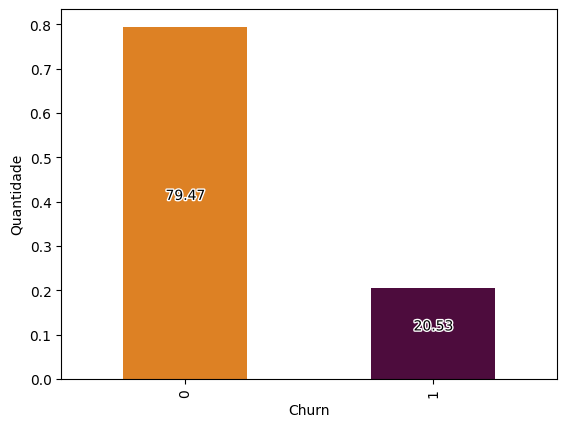

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Criando um gráfico de barras para observar a proporção entre casos de DESISTÊNCIA E NÃO DESISTÊNCIA do cartão crédito
ax = df['Exited'].value_counts(normalize=True).plot(kind='bar', color=colors)

plt.xlabel('Churn')
plt.ylabel('Quantidade')

# Adicionando os valores dentro das barras com borda
for p in ax.patches:
    text = ax.annotate(
        round(float(p.get_height()*100),2), 
        (p.get_x() + p.get_width() / 2, p.get_height() / 2), #Alinhamento à barra
        ha='center', #Alinhamento ao 'cursor'
        va='center', #Alinhamento ao 'cursor'
        xytext=(0, 5),  # Ajuste vertical (5 unidades acima do topo da barra)
        textcoords='offset points',
    )
    text.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='white'),  # Borda
        path_effects.Normal()
    ])

plt.show()


In [11]:
#Encoding categorical variables to numeric
le = LabelEncoder()
#Defining columns
for i in ['Gender', 'Geography']:
    #Adjusting columns
    le.fit(df[i])
    #Looking the classes at the column
#    list(le.classes_)
    #Transforming non-numerical label to numerical
    df[i] = le.transform(df[i])

In [12]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,608,2,0,41,1,8380786,1,0,1,11254258,0
1,850,2,0,43,2,12551082,1,1,1,790841,0
2,645,2,1,44,8,11375578,2,1,0,14975671,1
3,376,1,0,29,4,11504674,4,1,0,11934688,1
4,497,2,1,24,3,0,2,1,0,7639001,0
...,...,...,...,...,...,...,...,...,...,...,...
3739,794,0,0,62,9,12368132,3,1,0,17358663,1
3740,554,0,0,44,6,9243686,1,1,0,1260339,0
3741,807,0,0,36,4,0,2,0,1,14700733,0
3742,722,2,1,43,1,0,1,1,0,4456017,1


In [13]:
#Zeroing the main diagonal
corrmatrix = df.corr()
np.fill_diagonal(corrmatrix.values, 0)

In [14]:
#Looking for the maximum values in the matrix by the descending sort
corrmatrix.max().sort_values(ascending=False).head(3)

Age               0.277069
Exited            0.277069
IsActiveMember    0.103320
dtype: float64

In [15]:
#Looking for the minimun values in the matrix by the descending sort
corrmatrix.min().sort_values(ascending=True).head(3)

Balance          -0.270627
NumOfProducts    -0.270627
IsActiveMember   -0.173995
dtype: float64

In [16]:
#It can be seen that the 'Age', 'Exited' and 'IsActiveMember' have positive correlated varibles
#However, 'Balance', 'NumOfProducts', 'IsActiveMember' and Exited have negative correlated variables
corrmatrix

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,0.000000,0.016677,0.014942,0.003025,0.011701,0.021088,-0.010697,-0.006671,0.041031,-0.002421,-0.024457
Geography,0.016677,0.000000,-0.007461,0.021264,-0.005413,0.019219,0.006319,-0.019564,-0.003218,-0.011745,0.009459
Gender,0.014942,-0.007461,0.000000,-0.018819,0.016860,0.004414,-0.019180,-0.000410,0.017674,-0.011246,-0.110412
Age,0.003025,0.021264,-0.018819,0.000000,0.002354,0.003540,-0.040289,-0.000998,0.103320,-0.023515,0.277069
Tenure,0.011701,-0.005413,0.016860,0.002354,0.000000,-0.024300,0.024737,0.036039,-0.027276,-0.004604,-0.017673
Balance,0.021088,0.019219,0.004414,0.003540,-0.024300,0.000000,-0.270627,-0.018505,-0.026115,0.005867,0.087989
NumOfProducts,-0.010697,0.006319,-0.019180,-0.040289,0.024737,-0.270627,0.000000,-0.015836,0.015222,0.013902,-0.051886
HasCrCard,-0.006671,-0.019564,-0.000410,-0.000998,0.036039,-0.018505,-0.015836,0.000000,-0.018952,-0.022493,-0.005748
IsActiveMember,0.041031,-0.003218,0.017674,0.103320,-0.027276,-0.026115,0.015222,-0.018952,0.000000,-0.003322,-0.173995
EstimatedSalary,-0.002421,-0.011745,-0.011246,-0.023515,-0.004604,0.005867,0.013902,-0.022493,-0.003322,0.000000,0.002581


<Axes: >

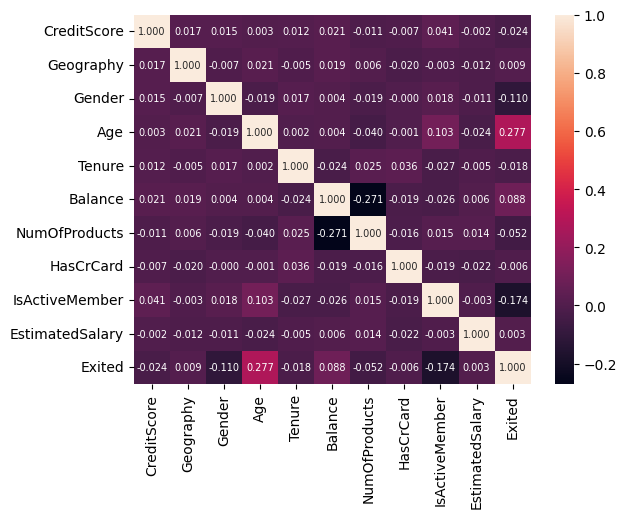

In [17]:
#Viewing it through a heatmap
sns.heatmap(df.corr(), annot=True, annot_kws={"size":7}, fmt='.3f')

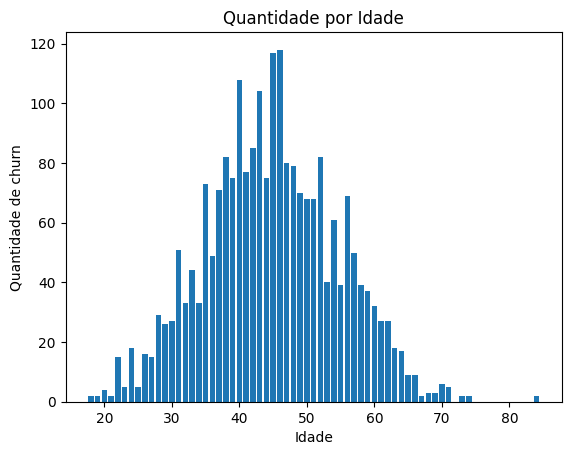

In [18]:
#Analysing the relationship between Age and Exited
idades = [x for x in df['Age']]
totais = [x for x in df['Exited']]

contagem = {}

for i in range(len(idades)):
    if totais[i] == 1:
        if idades[i] in contagem:
            contagem[idades[i]] += 1
        else:
            contagem[idades[i]] = 1
#    print(len(idades), len(totais))

x = [x for x in contagem]
y = [contagem[x] for x in contagem]

plt.title("Quantidade por Idade")
plt.xlabel("Idade")
plt.ylabel("Quantidade de churn")
plt.bar(x, y)
plt.show()

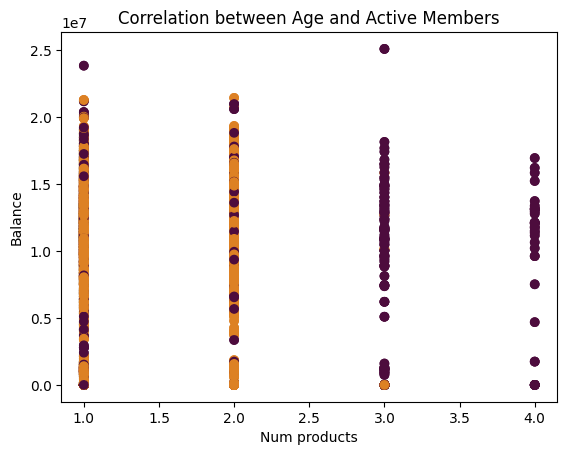

In [43]:
#Criando um gráfico do tipo "Scatter" para observar a proporção entre número de produtos e balanço
x = df['NumOfProducts']
y = df['Balance']
categorias = df['Exited']

cores = [colors[0] if cat==0 else colors[1] for cat in categorias]
plt.title('Correlation between Age and Active Members')
plt.xlabel('Num products')
plt.ylabel('Balance')
plt.scatter(x, y, color=cores)

plt.show()
#sns.scatterplot(df, x=df['Age'], y=df['EstimatedSalary'], hue='Geography', style='Geography')

## Criando o Modelo

No caso, são necessárias 4 variáveis no modelo. 2 de treino e 2 de teste:
Isso acontece porque elas são mapeadas em um plano cartesiano, sendo de treino ou teste;
Daí um ponto para treino no plano cartesiano tem uma posição em X e outra em y e outro ponto, para teste, tem uma posição em X e outra posição em y. Formando os 4 pontos necessários:

X_train, y_train, X_test, y_test

In [49]:
#Definindo X e y
X = df.drop(columns=['Exited'])
y = df['Exited']

#Aplicando One-Hot Encoding
#X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

In [50]:
#Dividindo os dados em conjuntos de treino e teste.
#"train_test_split (X, y, test_size=0.3)" serve para dividir o dataframe em grupos de treino e teste utilizando um valor entre 0 e 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Normalizando os dados
scaler = StandardScaler()

# Converter X_train e X_test para arrays numpy
X_train = X_train.values
X_test = X_test.values

#Aplicando o scaler nos conjuntos de treino e teste
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [52]:
#Escolhe um mondelo, no caso, random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

#Treina o modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
#Faz previsões com os dados de teste
y_pred = model.predict(X_test)

#Avalia a performance:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*10:.2f}%')

#Exibe um relatório de classificação
print(classification_report(y_test, y_pred))

Accuracy: 9.71%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2686
           1       0.96      0.89      0.92       685

    accuracy                           0.97      3371
   macro avg       0.97      0.94      0.95      3371
weighted avg       0.97      0.97      0.97      3371



In [54]:
#Criando e observando a Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[2663,   23],
       [  76,  609]], dtype=int64)

In [55]:
#Heatmap da matriz de confusão


In [56]:
#Melhorando a performance
from sklearn.model_selection import GridSearchCV

#Define o grid de parâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [57]:
#Configurando a busca
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [58]:
#Executa a busca
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [59]:
#Melhor combinação de hiperparâmetros
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [60]:
#Avaliando o modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accucracy: {accuracy*100:.2f}%')
print(classification_report(y_test, y_pred))

Accucracy: 97.06%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2686
           1       0.96      0.89      0.92       685

    accuracy                           0.97      3371
   macro avg       0.97      0.94      0.95      3371
weighted avg       0.97      0.97      0.97      3371



In [70]:
#Testando em uma nova amostra, de fora do banco de dados inicial
new_sample = np.array([[720, 1, 1, 55, 7, 9500000, 0.1, 0, 1, 8500000]]) # Exemplo de uma nova amostra, cada valor corresponde respectivamente a cada coluna

#Normalização da amostra
new_sample_normalized = scaler.transform(new_sample)

#Previsão
predicted_class = model.predict(new_sample_normalized)
predicted_probabilities = model.predict_proba(new_sample_normalized)

#Resultado
#print(f'Predicted class: {y.[predicted_class[0]]}')
print(f'Previsão de Probabilidade (Churn, Não Churn): {predicted_probabilities}')


Previsão de Probabilidade (Churn, Não Churn): [[0.65 0.35]]


In [66]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [64]:
Age               0.277069
Balance          -0.270627
NumOfProducts    -0.270627
IsActiveMember   -0.173995
Exited            0.277069


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Contact me
Linkedin: https://www.linkedin.com/in/jose-valdeir-paiva-araujo/

Github: https://github.com/Rumanns

Gmail: valdeircomv@gmail.com




